# KNN Classifier

## **1. Introduction to k Nearest Neighbours algorithm** <a class="anchor" id="1"></a>

In machine learning, k Nearest Neighbours or kNN is the simplest of all machine learning algorithms. It is a non-parametric algorithm used for classification and regression tasks. Non-parametric means there is no assumption required for data distribution. So, kNN does not require any underlying assumption to be made. In both classification and regression tasks, the input consists of the k closest training examples in the feature space. The output depends upon whether kNN is used for classification or regression purposes.

-	In kNN classification, the output is a class membership. The given data point is classified based on the majority of type of its neighbours. The data point is assigned to the most frequent class among its k nearest neighbours. Usually k is a small positive integer. If k=1, then the data point is simply assigned to the class of that single nearest neighbour.

-	In kNN regression, the output is simply some property value for the object. This value is the average of the values of k nearest neighbours.


kNN is a type of instance-based learning or lazy learning. Lazy learning means it does not require any training data points for model generation. All training data will be used in the testing phase. This makes training faster and testing slower and costlier. So, the testing phase requires more time and memory resources.

In kNN, the neighbours are taken from a set of objects for which the class or the object property value is known. This can be thought of as the training set for the kNN algorithm, though no explicit training step is required. In both classification and regression kNN algorithm, we can assign weight to the contributions of the neighbours. So, nearest neighbours contribute more to the average than the more distant ones.



# **2. k Nearest Neighbours intuition** <a class="anchor" id="2"></a>

The kNN algorithm intuition is very simple to understand. It simply calculates the distance between a sample data point and all the other training data points. The distance can be Euclidean distance or Manhattan distance. Then, it selects the k nearest data points where k can be any integer. Finally, it assigns the sample data point to the class to which the majority of the k data points belong.


Now, we will see kNN algorithm in action. Suppose, we have a dataset with two variables which are classified as `Red` and `green`.


In kNN algorithm, k is the number of nearest neighbours. Generally, k is an odd number because it helps to decide the majority of the class. When k=1, then the algorithm is known as the nearest neighbour algorithm.

Now, we want to classify a new data point `X` into `green` class or `Red` class. Suppose the value of k is 3. The kNN algorithm starts by calculating the distance between `X` and all the other data points. It then finds the 3 nearest points with least distance to point `X`. 


In the final step of the kNN algorithm, we assign the new data point `X` to the majority of the class of the 3 nearest points. If 2 of the 3 nearest points belong to the class `Red` while 1 belong to the class `green`, then we classify the new data point  as `Red`.


![avatar](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png)

# **3. How to decide the number of neighbours in kNN** <a class="anchor" id="3"></a>

While building the kNN classifier model, one question that come to my mind is what should be the value of nearest neighbours (k) that yields highest accuracy. This is a very important question because the classification accuracy depends upon our choice of k.

The number of neighbours (k) in kNN is a parameter that we need to select at the time of model building. Selecting the optimal value of k in kNN is the most critical problem. A small value of k means that noise will have higher influence on the result. So, probability of overfitting is very high. A large value of k makes it computationally expensive in terms of time to build the kNN model. Also, a large value of k will have a smoother decision boundary which means lower variance but higher bias.

The data scientists choose an odd value of k if the number of classes is even. We can apply the elbow method to select the value of k. To optimize the results, we can use Cross Validation technique. Using the cross-validation technique, we can test the kNN algorithm with different values of k. The model which gives good accuracy can be considered to be an optimal choice. It depends on individual cases and at times best process is to run through each possible value of k and test our result.

![avatar](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [112]:
dataset = pd.read_csv('dataset/diabetes.csv')
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [113]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

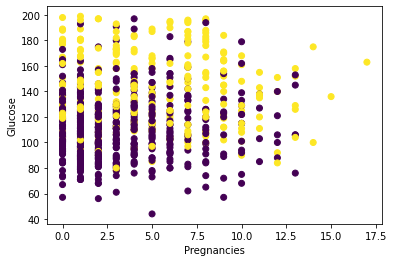

In [114]:
plt.scatter(dataset['Pregnancies'],
            dataset['Glucose'],
            c=dataset['Outcome'])
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.show()

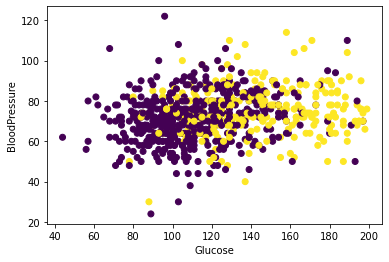

In [115]:
plt.scatter(dataset['Glucose'],
            dataset['BloodPressure'],
            c=dataset['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

In [116]:
from itertools import combinations

In [117]:
L = list(x for x in combinations(dataset.iloc[:,0:8], 2))

In [118]:
len(L)

28

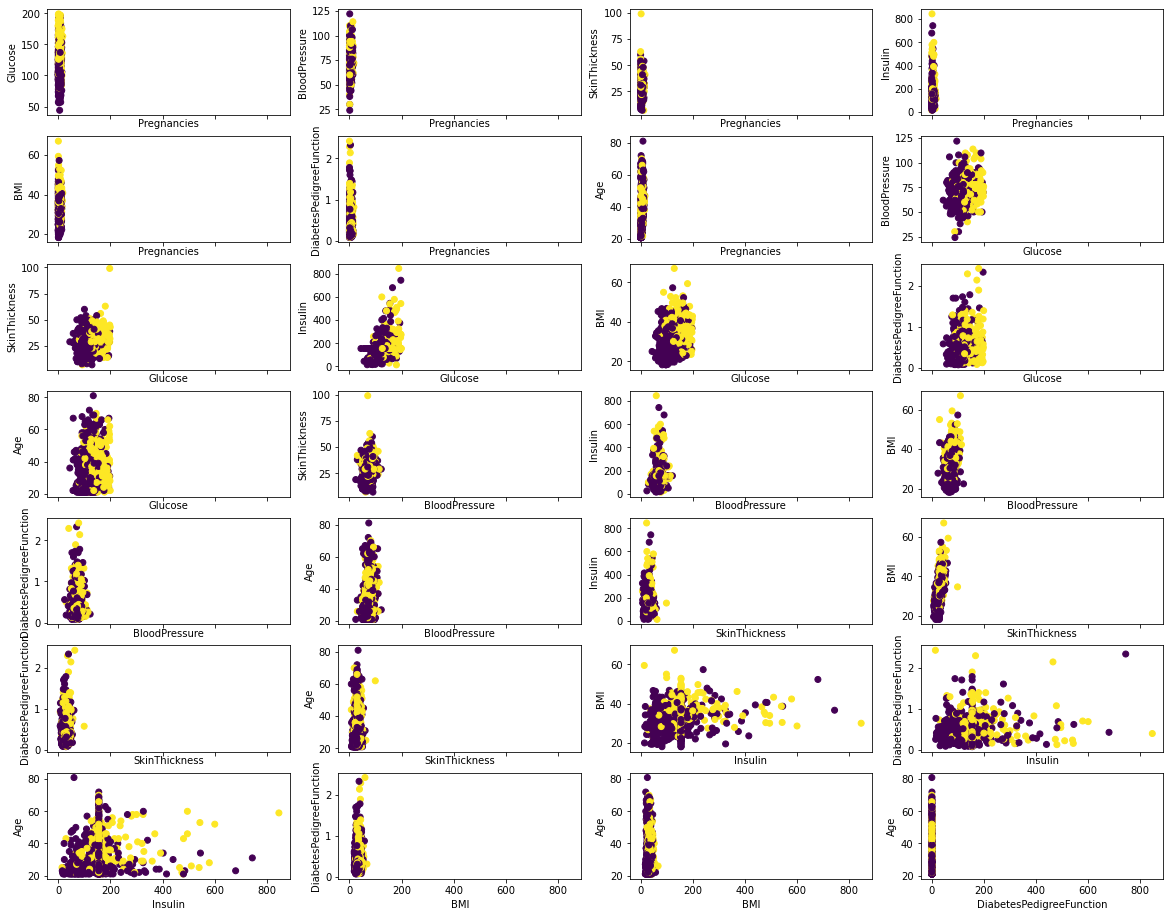

In [119]:
fig, ax = plt.subplots(nrows = 7, 
                       ncols = 4, 
                       sharex = True, 
                       figsize = (20, 16))

for p, q in zip(L, [(i, j) for i in range(0,7) for j in range(0,4)]):
    ax[q[0], q[1]].scatter(dataset[p[0]],
                           dataset[p[1]],
                           c = dataset['Outcome'])
    ax[q[0], q[1]].set_xlabel(p[0])
    ax[q[0], q[1]].set_ylabel(p[1]) 
plt.show()

In [120]:
def labels(feature1, feature2):
    X = dataset[[feature1,
                  feature2 ]].to_numpy()

    y = dataset['Outcome'].to_numpy()
    return X, y

In [121]:
X, y = labels('Glucose', 'SkinThickness')

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [124]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [125]:
distance(X[10], X[67])

1.0

In [126]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [127]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([101.,  17.]), 0, 0.0],
 [array([99., 17.]), 0, 2.0],
 [array([99., 17.]), 0, 2.0],
 [array([99., 16.]), 0, 2.23606797749979],
 [array([100.,  15.]), 0, 2.23606797749979]]

In [128]:
y_test[-1]

0

In [129]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [130]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/k

In [131]:
classification_error(X_test, y_test, X_train, y_train, 25)

2.76

In [132]:
possible_k = [x for x in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

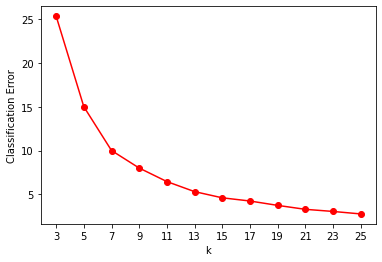

In [ ]:
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(possible_k)
plt.show()

In [ ]:
predicted_labels = [KNN_Predict(point, 
                                X_train, 
                                y_train, 
                                9) for point in X_test]

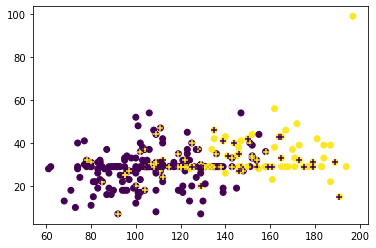

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted_labels)

plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, marker = '+')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size= 0.2)

In [ ]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
f1 = []
accuracy = []
k = [i for i in range(3,26,2)] 
for i in k:
    classifier = KNeighborsClassifier(n_neighbors = i, p = 2, metric = 'euclidean')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    f1.append(f1_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))

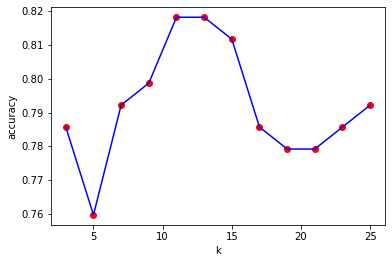

In [ ]:
plt.plot(k, accuracy, color = 'blue')
plt.scatter(k, accuracy, color = 'red')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

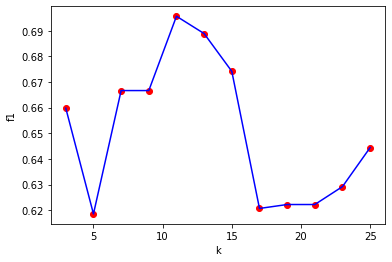

In [ ]:
plt.plot(k, f1, color = 'blue')
plt.scatter(k, f1, color = 'red')
plt.xlabel('k')
plt.ylabel('f1')
plt.show()